In [1]:
import networkx as nx
import matplotlib.pyplot as plt 
import time
import gc
import pandas as pd
import numpy as np
from ranking import *


In [2]:

def measure_pagerank_time(data, user_id_column,
                          movie_id_column, rating_column,
                          pers=1, count_measure=3, directional = False):
    """
    Измеряет время выполнения создания объекта PageRank и время вычисления 
    PageRank для заданных данных, уменьшая влияние сборщика мусора.

    Args:
        data: DataFrame с данными рекомендаций.
        user_id_column: Название столбца с ID пользователей.
        movie_id_column: Название столбца с ID фильмов.
        rating_column: Название столбца с рейтингом.
        pers: Параметр pers для PagerankFactory.
        count_measure: Количество измерений (для усреднения).

    Returns:
        Tuple: Время создания объекта PageRank (в секундах), 
               время выполнения get_pagerank (в секундах).
    """
    gc.collect()

    # Измеряем время создания объекта
    start_time_creation = time.time()
    pg = PagerankFactory().read_pd(data, user_id_column, movie_id_column, rating_column, pers, directional)
    end_time_creation = time.time()
    creation_time = end_time_creation - start_time_creation

    # Измеряем время выполнения get_pagerank
    start_time_calculation = time.time()
    for _ in range(count_measure):
        _ = pg.get_pagerank()
    end_time_calculation = time.time()
    execution_time = (end_time_calculation - start_time_calculation) / count_measure

    return creation_time, execution_time

In [3]:
def measure_hits_time(data, user_id_column,
                          movie_id_column, rating_column,
                          pers=1, count_measure=3, directional = False):
    gc.collect()

    # Измеряем время создания объекта
    start_time_creation = time.time()
    pg = HITSFactory().read_pd(data, user_id_column, movie_id_column, rating_column, pers, directional)
    end_time_creation = time.time()
    creation_time = end_time_creation - start_time_creation

    # Измеряем время выполнения get_pagerank
    start_time_calculation = time.time()
    for _ in range(count_measure):
        _ = pg.get_rank()
    end_time_calculation = time.time()
    execution_time = (end_time_calculation - start_time_calculation) / count_measure

    return creation_time, execution_time

In [4]:
def plot_time(filename):
    """
    Строит график зависимости времени выполнения  от размера выборки.

    Args:
        filename: Имя файла CSV с данными о времени выполнения.
    """
    df = pd.read_csv(filename)

    # Строим график
    plt.plot(df['Размер выборки'], df['Время выполнения'], marker='o')

    # Настраиваем оси и заголовок графика
    plt.xlabel('Размер выборки')
    plt.ylabel('Время выполнения (секунды)')
    plt.title('Зависимость времени выполнения  от размера выборки')

    # Отображаем график
    plt.show()

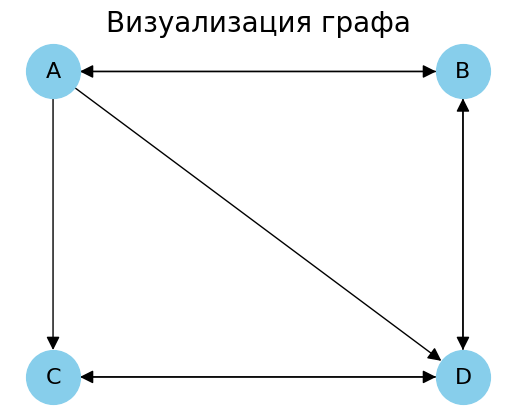

In [13]:

# Задаем позиции узлов
pos = {'A': (0, 2), 'B': (2, 2), 'C': (0, 0), 'D': (2, 0)}
# Создаем граф (используем граф из предыдущих примеров)
graph = nx.DiGraph()  # DiGraph - для ориентированного графа
graph.add_edges_from([('A', 'B'), ('B', 'A'),
                      ('B', 'D'), ('D', 'B'),
                      ('D', 'C'), ('C', 'D'),
                      ('A', 'C'),
                      ('A', 'D')])


plt.title("Визуализация графа", fontsize=20) 
# Визуализируем граф
nx.draw(graph, pos=pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=16, arrowsize=20)
plt.show()

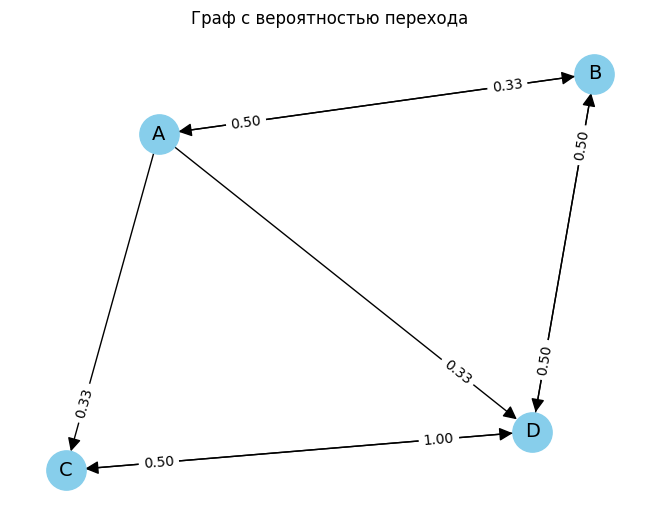

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_transition_matrix(matrix):
    """
    Визуализирует матрицу переходов в виде графа,
    где веса ребер - значения из матрицы,
    с учетом разных весов для (A, B) и (B, A).

    Args:
        matrix: Матрица переходов (список списков).
    """

    num_nodes = len(matrix)
    graph = nx.DiGraph()

    ABCDE = "ABCDE"
    for i in range(num_nodes):
        for j in range(num_nodes):
            weight = matrix[i][j]
            if weight > 0:
                # Добавляем ребро с весом 
                graph.add_edge(ABCDE[i], ABCDE[j], weight=weight)

    # Создаем словарь с подписями для ребер,
    # используем оба направления для ключа
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in graph.edges(data=True)}

    # Размещаем узлы, избегая наложения
    pos = nx.spring_layout(graph, k=0.3*1/num_nodes)

    # Рисуем граф
    nx.draw(graph, pos, with_labels=True, node_size=800, node_color='skyblue', font_size=14, arrowsize=20)

    # Добавляем подписи на ребра с учетом смещения
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, label_pos=0.2)

    plt.title("Граф с вероятностью перехода")
    plt.show()

# Пример матрицы переходов (из предыдущих примеров)
matrix = [
    [0, 0.33, 0.33, 0.33],
    [0.5,   0,   0,  0.5],
    [0,   0,   0,  1],
    [0,   0.5,   0.5,  0]
]

# Визуализируем граф
visualize_transition_matrix(matrix)

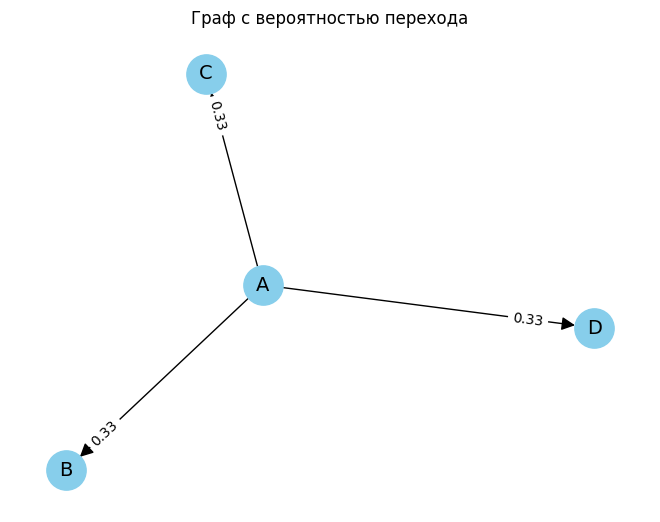

In [15]:
# Пример матрицы переходов (из предыдущих примеров)
matrix = [
    [0, 0.33, 0.33, 0.33],
    [0,   0,   0,  0],
    [0,   0,   0,  0],
    [0,   0,   0,  0]
]

# Визуализируем граф
visualize_transition_matrix(matrix)

In [16]:


df = pd.read_csv("res\\movie\\rating.csv")

# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    data = df.sample(frac=i)
    creation_time, execution_time = measure_pagerank_time(data, 'userId', 'movieId', 'rating')
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

# Сохраняем DataFrame в файл CSV
results_df.to_csv('pagerank_time_results.csv', index=False)

100%|██████████| 100/100 [00:10<00:00,  9.25it/s]


Время создания: 2.0206 секунд
Время выполнения: 10.9481 секунд
Размер 0.1


100%|██████████| 100/100 [00:21<00:00,  4.68it/s]


Время создания: 3.9978 секунд
Время выполнения: 21.6094 секунд
Размер 0.2


100%|██████████| 100/100 [00:31<00:00,  3.16it/s]


Время создания: 6.0999 секунд
Время выполнения: 32.0264 секунд
Размер 0.30000000000000004


100%|██████████| 100/100 [00:41<00:00,  2.39it/s]


Время создания: 7.9337 секунд
Время выполнения: 42.4310 секунд
Размер 0.4


100%|██████████| 100/100 [00:53<00:00,  1.88it/s]


Время создания: 10.3529 секунд
Время выполнения: 52.8810 секунд
Размер 0.5


100%|██████████| 100/100 [01:02<00:00,  1.59it/s]


Время создания: 12.0903 секунд
Время выполнения: 62.8918 секунд
Размер 0.6


100%|██████████| 100/100 [01:13<00:00,  1.37it/s]


Время создания: 13.7638 секунд
Время выполнения: 73.3524 секунд
Размер 0.7000000000000001


100%|██████████| 100/100 [01:23<00:00,  1.20it/s]


Время создания: 15.9054 секунд
Время выполнения: 83.8641 секунд
Размер 0.8


100%|██████████| 100/100 [01:32<00:00,  1.08it/s]


Время создания: 18.4365 секунд
Время выполнения: 93.5440 секунд
Размер 0.9


100%|██████████| 100/100 [01:50<00:00,  1.11s/it]


Время создания: 19.7900 секунд
Время выполнения: 107.6469 секунд
Размер 1.0


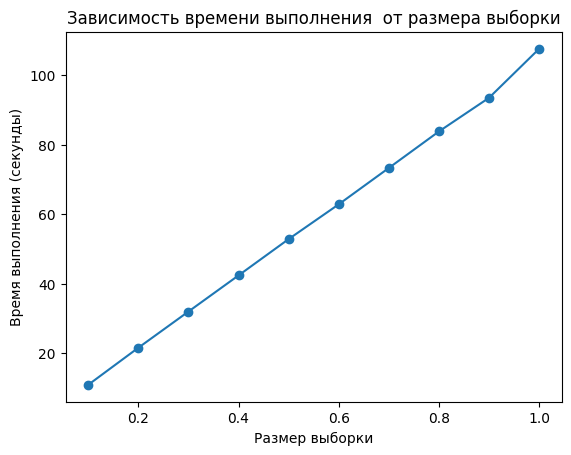

In [17]:
plot_time('pagerank_time_results.csv')

In [5]:
df = pd.read_csv("res\\movie\\rating.csv")

# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    data = df.sample(frac=i)
    creation_time, execution_time = measure_hits_time(data, 'userId', 'movieId', 'rating', count_measure=8)
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

# Сохраняем DataFrame в файл CSV
results_df.to_csv('hits_time_results.csv', index=False)

C:\Users\odo20\AppData\Roaming\Python\Python312\site-packages\scipy\sparse\_base.py:713: RuntimeWarning: divide by zero encountered in divide
  recip = np.true_divide(1., other)


Время создания: 2.0514 секунд
Время выполнения: 0.6091 секунд
Размер 0.1
Время создания: 3.9517 секунд
Время выполнения: 0.7409 секунд
Размер 0.2
Время создания: 5.8555 секунд
Время выполнения: 0.7261 секунд
Размер 0.30000000000000004
Время создания: 7.6137 секунд
Время выполнения: 0.8972 секунд
Размер 0.4
Время создания: 9.6052 секунд
Время выполнения: 1.0581 секунд
Размер 0.5
Время создания: 11.6759 секунд
Время выполнения: 1.2410 секунд
Размер 0.6
Время создания: 13.8033 секунд
Время выполнения: 1.3964 секунд
Размер 0.7000000000000001
Время создания: 15.6400 секунд
Время выполнения: 1.5628 секунд
Размер 0.8
Время создания: 17.8526 секунд
Время выполнения: 1.7489 секунд
Размер 0.9
Время создания: 19.0802 секунд
Время выполнения: 1.8806 секунд
Размер 1.0


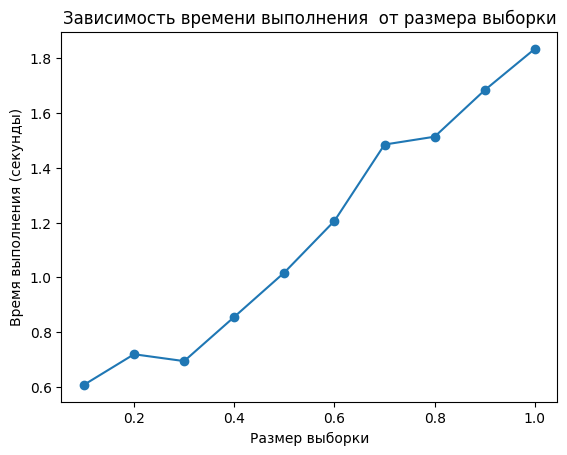

In [11]:
plot_time('hits_time_results.csv')

In [12]:
filename = './res/google_graph/web-Google.txt'
skiprows = 0
with open(filename , 'r') as f:
    for line in f:
        if line[0] != "#":
            break
        skiprows += 1

df = pd.read_csv(filename , sep='\t', header=None,
                   skiprows=skiprows, dtype=int,
                   names=['source', 'target'])
df['edge_attr'] = 1

In [8]:
# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    data_slice = df.sample(frac=i)
    creation_time, execution_time = measure_pagerank_time(data_slice, 'source', 'target', 'edge_attr', data_slice['source'].min(), 3, True)
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

# Сохраняем DataFrame в файл CSV
results_df.to_csv('pagerank_time_results_web.csv', index=False)

100%|██████████| 100/100 [00:05<00:00, 16.77it/s]


Время создания: 1.0525 секунд
Время выполнения: 7.6000 секунд
Размер 0.1


100%|██████████| 100/100 [00:15<00:00,  6.59it/s]


Время создания: 1.9347 секунд
Время выполнения: 18.2004 секунд
Размер 0.2


100%|██████████| 100/100 [00:24<00:00,  4.05it/s]


Время создания: 2.6565 секунд
Время выполнения: 29.2029 секунд
Размер 0.30000000000000004


100%|██████████| 100/100 [00:39<00:00,  2.54it/s]


Время создания: 3.3475 секунд
Время выполнения: 42.5014 секунд
Размер 0.4


100%|██████████| 100/100 [00:54<00:00,  1.85it/s]


Время создания: 4.2753 секунд
Время выполнения: 59.3135 секунд
Размер 0.5


100%|██████████| 100/100 [01:04<00:00,  1.55it/s]


Время создания: 5.2154 секунд
Время выполнения: 66.0649 секунд
Размер 0.6


100%|██████████| 100/100 [01:08<00:00,  1.45it/s]


Время создания: 5.7031 секунд
Время выполнения: 75.6238 секунд
Размер 0.7000000000000001


100%|██████████| 100/100 [01:19<00:00,  1.26it/s]


Время создания: 6.3689 секунд
Время выполнения: 84.3923 секунд
Размер 0.8


100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


Время создания: 7.0984 секунд
Время выполнения: 96.5918 секунд
Размер 0.9


100%|██████████| 100/100 [01:44<00:00,  1.05s/it]


Время создания: 7.8743 секунд
Время выполнения: 109.3298 секунд
Размер 1.0


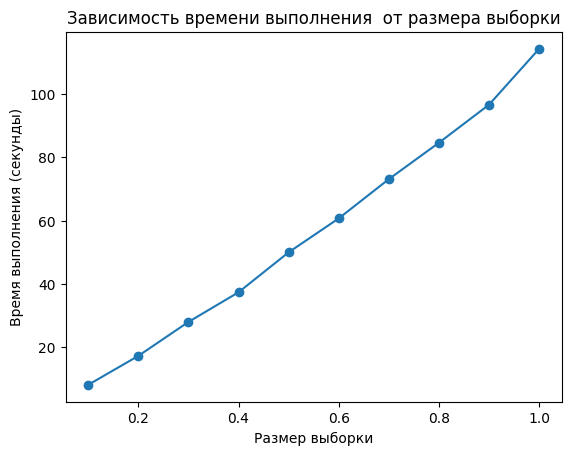

In [ ]:
plot_time('pagerank_time_results_web.csv')

In [13]:
# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    data_slice = df.sample(frac=i)
    creation_time, execution_time = measure_hits_time(data_slice, 'source', 'target', 'edge_attr',data_slice['source'].min(), 3, True)
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

# Сохраняем DataFrame в файл CSV
results_df.to_csv('hits_time_results_web.csv', index=False)

Время создания: 1.2051 секунд
Время выполнения: 2.8160 секунд
Размер 0.1
Время создания: 2.0205 секунд
Время выполнения: 4.3614 секунд
Размер 0.2
Время создания: 3.1215 секунд
Время выполнения: 5.7631 секунд
Размер 0.30000000000000004
Время создания: 3.5775 секунд
Время выполнения: 6.7328 секунд
Размер 0.4
Время создания: 4.4083 секунд
Время выполнения: 6.5916 секунд
Размер 0.5
Время создания: 5.0683 секунд
Время выполнения: 7.5235 секунд
Размер 0.6
Время создания: 5.8328 секунд
Время выполнения: 8.6697 секунд
Размер 0.7000000000000001
Время создания: 6.6147 секунд
Время выполнения: 8.9281 секунд
Размер 0.8
Время создания: 7.2726 секунд
Время выполнения: 9.5519 секунд
Размер 0.9
Время создания: 8.4494 секунд
Время выполнения: 10.2148 секунд
Размер 1.0


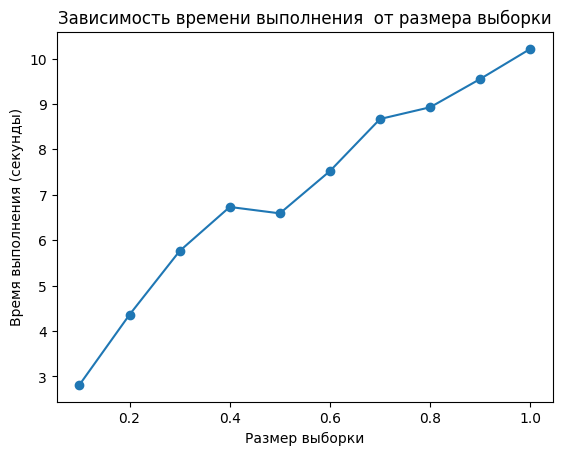

In [14]:
plot_time('hits_time_results_web.csv')

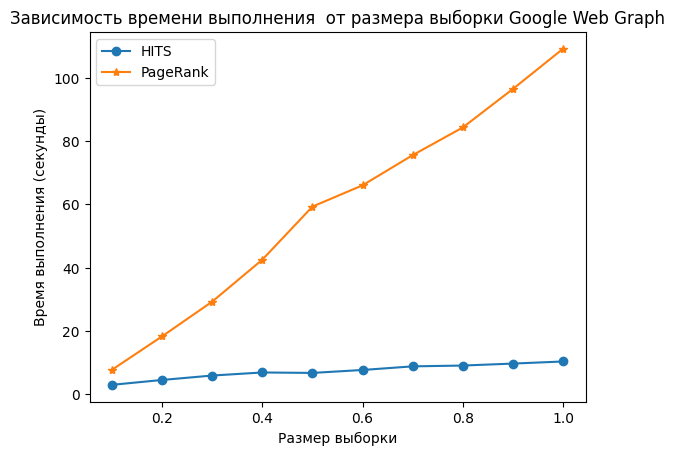

In [15]:

df = pd.read_csv('hits_time_results_web.csv')
plt.plot(df['Размер выборки'], df['Время выполнения'],
         marker='o', label='HITS')


df = pd.read_csv('pagerank_time_results_web.csv')
plt.plot(df['Размер выборки'], df['Время выполнения'],
         marker='*', label='PageRank')

plt.legend()

# Настраиваем оси и заголовок графика
plt.xlabel('Размер выборки')
plt.ylabel('Время выполнения (секунды)')
plt.title('Зависимость времени выполнения  от размера выборки Google Web Graph')

# Отображаем график
plt.show()

In [15]:
import scipy as sp
import numpy as np
from scipy.sparse.linalg import svds
import time

rows = 1000
cols = 1000

# Генерация случайной матрицы
m = [[0, 1/3, 1/3, 1/3],
     [1/2, 0, 0, 1/2],
     [0, 0, 0, 1],
     [0, 1/2, 1/2, 0]]#np.random.rand(rows, cols) * 3 - 1
A = sp.sparse.csr_matrix(m, dtype=float)  # Явно указываем тип данных как float

t1 = time.time()
_, _, vt = svds(A, k=1) 
t2 = time.time()
print(f"Время {t2-t1}")
print(vt.real )

Время 0.0010006427764892578
[[-0.19993654 -0.1467283  -0.1467283  -0.95758394]]
